<a href="https://colab.research.google.com/github/Whiner123/auti-price/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_c = pd.read_csv("/content/drive/MyDrive/Car_sales.csv")
df_c.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [ ]:
print(f"количество дубликатов: {df_c.duplicated().sum()}")

количество дубликатов: 0


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
df_c.Manufacturer = df_c.Manufacturer.astype('category')
df_c.Model = df_c.Model.astype('category')
df_c.Vehicle_type = df_c.Vehicle_type.astype('category')

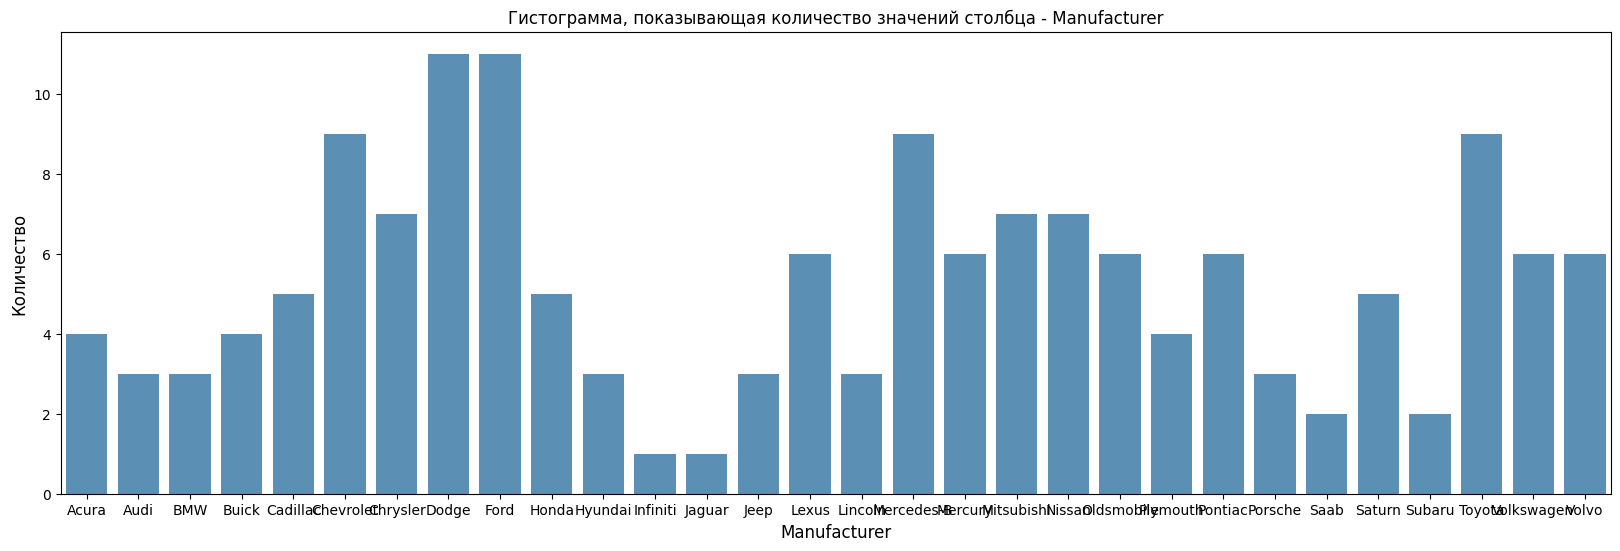

In [ ]:
manufacturer_count = df_c['Manufacturer'].value_counts(dropna = False)
plt.figure(figsize=(20, 6))
sns.barplot(x=manufacturer_count.index, y=manufacturer_count.values, alpha=0.8)
plt.title('Гистограмма, показывающая количество значений столбца - Manufacturer')
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Manufacturer', fontsize=12)
plt.show()


In [ ]:
mean_price_manufacturer = df_c[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.213636
8,Ford,21.047273
9,Honda,20.277000


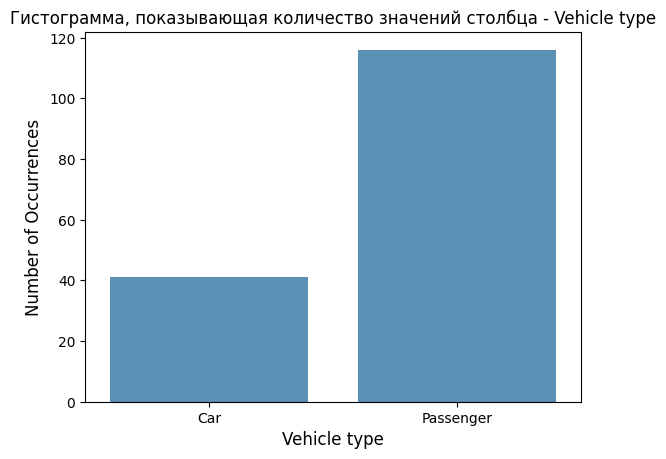

In [ ]:
vehicle_count = df_c['Vehicle_type'].value_counts(dropna = False)
sns.barplot(x = vehicle_count.index, y =  vehicle_count.values, alpha = 0.8)
plt.title('Гистограмма, показывающая количество значений столбца - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()


In [ ]:
mean_price_vehicle = df_c[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

,Vehicle_type,Price_in_thousands
0,Car,26.319975
1,Passenger,27.763200


<Axes: >

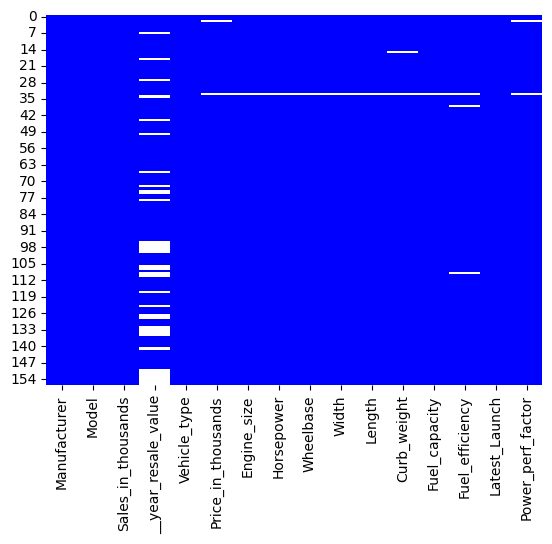

In [ ]:
import seaborn as sns
clr = ['blue','white']
sns.heatmap(df_c.isnull(),cmap = sns.color_palette(clr),cbar = False)

In [ ]:

print('Форма датасета до удаления строк с более чем одним пропуском',df_c.shape)
v = 1
df_c = df_c[df_c.isnull().sum(axis = 1) <= v]
print('Форма датасета после                                        ',df_c.shape)


Форма датасета до удаления строк с более чем одним пропуском (157, 16)
Форма датасета после                                         (154, 16)


In [ ]:
isna= df_c.__year_resale_value.isna()
print('Заполненность данными:',len(isna[isna == False])/len(isna))

Заполненность данными: 0.7727272727272727


In [ ]:
df_num = df_c.select_dtypes('float64')
print('Форма датасета содержащего только числовые значения',df_num.shape)

Форма датасета содержащего только числовые значения (154, 12)


In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(df_num) # устанавливаем импьютер на датафрейм
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)

In [ ]:
print(df_c.shape)
print(df_num.shape)

(154, 16)
(154, 12)


In [ ]:
df_c['__year_resale_value'] = df_num['__year_resale_value']
df_c['Curb_weight'] = df_num['Curb_weight']
df_c['Fuel_efficiency'] = df_num['Fuel_efficiency']
isna= df_c.isna()
print('Заполненность данными,после заполнения пропусков:',len(isna[isna == False])/len(isna))
df_c.head(10)


Заполненность данными,после заполнения пропусков: 1.0


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,15.548,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,11/2/2011,71.181451


In [ ]:
df_c.info()
df_check_emission = df_c.select_dtypes('float64')
df_check_emission.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         154 non-null    category
 1   Model                154 non-null    category
 2   Sales_in_thousands   154 non-null    float64 
 3   __year_resale_value  154 non-null    float64 
 4   Vehicle_type         154 non-null    category
 5   Price_in_thousands   154 non-null    float64 
 6   Engine_size          154 non-null    float64 
 7   Horsepower           154 non-null    float64 
 8   Wheelbase            154 non-null    float64 
 9   Width                154 non-null    float64 
 10  Length               154 non-null    float64 
 11  Curb_weight          154 non-null    float64 
 12  Fuel_capacity        154 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        154 non-null    object  
 15  Power_perf_factor    15

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,53.341234,18.670779,27.411799,3.057143,185.506494,107.481169,71.137662,187.257792,3.382448,17.956494,23.824675,76.983663
std,68.610361,11.180496,14.396078,1.050792,56.932163,7.689963,3.468402,13.496026,0.636191,3.912773,4.279657,25.213587
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.936250,12.056750,17.953750,2.300000,148.500000,103.000000,68.400000,177.525000,2.969000,15.800000,21.000000,60.247837
50%,29.213000,14.967500,22.747000,3.000000,175.000000,107.000000,70.450000,187.250000,3.341000,17.200000,24.000000,71.934478
75%,68.297250,20.836250,31.956250,3.725000,213.750000,112.200000,73.325000,196.175000,3.822500,19.725000,26.000000,89.421349
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [ ]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col +'_n'] = (df_num[col] - m) /s
df_std.head()

,Sales_in_thousands_n,__year_resale_value_n,Price_in_thousands_n,Engine_size_n,Horsepower_n,Wheelbase_n,Width_n,Length_n,Curb_weight_n,Fuel_capacity_n,Fuel_efficiency_n,Power_perf_factor_n
0,-0.530856,-0.206679,-0.410653,-1.196376,-0.799311,-0.816801,-1.106464,-1.100901,-1.168593,-1.215632,0.975621,-0.741803
1,-0.203427,0.107707,0.068644,0.135952,0.693694,0.080473,-0.241512,0.418064,0.211496,-0.193339,0.274631,0.570610
3,-0.652281,0.988706,1.013346,0.421451,0.430223,0.925730,0.075636,0.692219,0.734924,0.011119,-0.426360,0.571363
4,-0.480164,0.320578,-0.237690,-1.196376,-0.623663,-0.634745,-0.846979,-0.685964,-0.604297,-0.397798,0.741958,-0.563427
5,-0.503732,0.436852,0.454165,-0.244713,0.254575,0.158496,1.430727,0.351378,0.280658,0.138906,-0.426360,0.300689


In [ ]:
clustering =  DBSCAN (eps=4, min_samples=3).fit(df_std) #использование кластера DBSCAN
df_std['labels'] = clustering.labels_
df_c[df_std['labels'] == -1]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
39,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
56,Ford,F-Series,540.561,15.075,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,8/16/2012,89.401935


In [ ]:
class_1 = []
class_2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class_1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_price_manufacturer.iloc[index, 0])

manufacturer_data = df_c['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)

df_c['Manufacturer'] = new_manufacturer_data
df_c

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,2,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,2,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,2,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,V40,3.545,15.868,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,2,S70,15.245,13.852,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,2,V70,17.531,13.852,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,2,C70,3.493,33.749,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
age_data = []
launch_data = df_c['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(2024 - year)

df_c['Age'] = age_data
df_c.drop(['Latest_Launch'], axis = 1, inplace = True)
df_c.drop(['Model'], axis = 1, inplace = True)

<Axes: ylabel='Age'>

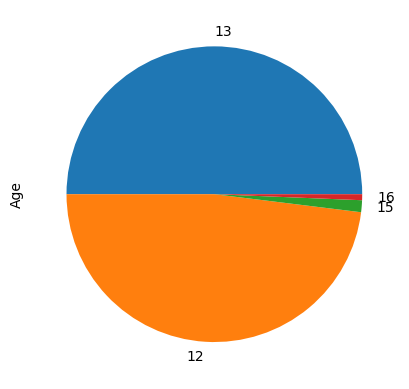

In [ ]:
df_c['Age'].value_counts(normalize=True).plot.pie()


In [ ]:
def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)

    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))

    dataframe[column] = new_data

num_columns = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
                    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for each_column in num_columns:
    normalize_columns(df_c, each_column)

In [ ]:
df_c

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,0.031102,0.179516,Passenger,21.50,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314,0.00
1,2,0.072669,0.235855,Passenger,28.40,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024,0.25
3,2,0.015687,0.393733,Passenger,42.00,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140,0.25
4,2,0.037537,0.274002,Passenger,23.99,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594,0.25
5,2,0.034545,0.294839,Passenger,33.95,0.257143,0.367089,0.349241,0.780347,0.567244,0.453087,0.377880,0.233333,0.371745,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,0.006356,0.171630,Passenger,24.40,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164,0.25
153,2,0.028004,0.139317,Passenger,27.50,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371,0.00
154,2,0.032234,0.139317,Passenger,28.80,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412,0.25
155,2,0.006260,0.458230,Passenger,45.50,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211,0.25


In [ ]:
encoded_dataset = pd.get_dummies(data = df_c, columns = ['Manufacturer', 'Vehicle_type'])
encoded_dataset

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger
0,0.031102,0.179516,21.50,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314,0.00,0,1,0,1
1,0.072669,0.235855,28.40,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024,0.25,0,1,0,1
3,0.015687,0.393733,42.00,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140,0.25,0,1,0,1
4,0.037537,0.274002,23.99,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594,0.25,0,1,0,1
5,0.034545,0.294839,33.95,0.257143,0.367089,0.349241,0.780347,0.567244,0.453087,0.377880,0.233333,0.371745,0.25,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.006356,0.171630,24.40,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164,0.25,0,1,0,1
153,0.028004,0.139317,27.50,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371,0.00,0,1,0,1
154,0.032234,0.139317,28.80,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412,0.25,0,1,0,1
155,0.006260,0.458230,45.50,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211,0.25,0,1,0,1


In [ ]:
target_data = encoded_dataset['Price_in_thousands']
encoded_dataset['Target'] = target_data
encoded_dataset.drop(['Price_in_thousands'], axis = 1, inplace = True)
encoded_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Target
0,0.031102,0.179516,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314,0.00,0,1,0,1,21.50
1,0.072669,0.235855,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024,0.25,0,1,0,1,28.40
3,0.015687,0.393733,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140,0.25,0,1,0,1,42.00
4,0.037537,0.274002,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594,0.25,0,1,0,1,23.99
5,0.034545,0.294839,0.257143,0.367089,0.349241,0.780347,0.567244,0.453087,0.377880,0.233333,0.371745,0.25,0,1,0,1,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.006356,0.171630,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164,0.25,0,1,0,1,24.40
153,0.028004,0.139317,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371,0.00,0,1,0,1,27.50
154,0.032234,0.139317,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412,0.25,0,1,0,1,28.80
155,0.006260,0.458230,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211,0.25,0,1,0,1,45.50


Text(0.5, 1.0, 'Correlation Heatmap')

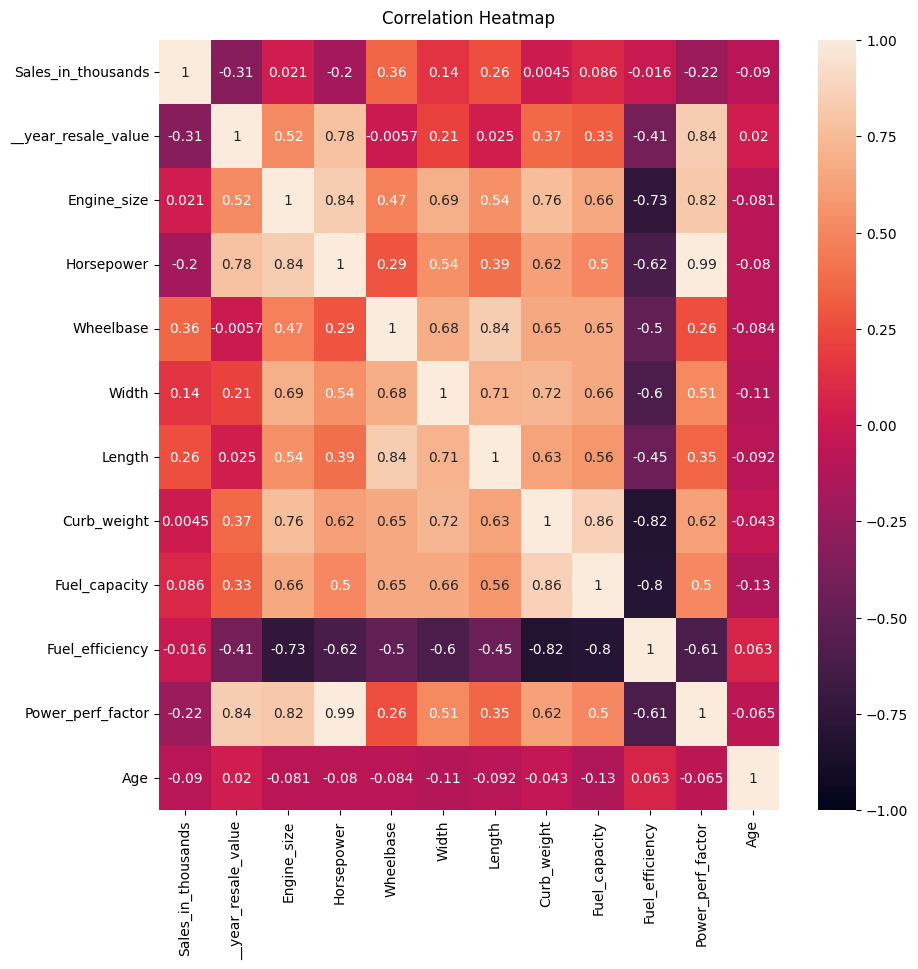

In [ ]:


filter_dataset = encoded_dataset[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase',
                                  'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
                                  'Age']]
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [ ]:
column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))

        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: Sales_in_thousands and VIF: 1.47
Column: __year_resale_value and VIF: 13.86
Column: Horsepower and VIF: 110.48
Column: Width and VIF: 3.06
Column: Length and VIF: 4.22
Column: Curb_weight and VIF: 6.71
Column: Fuel_capacity and VIF: 4.98
Column: Fuel_efficiency and VIF: 3.98
Column: Power_perf_factor and VIF: 3.74
Column: Age and VIF: 1.05


In [ ]:
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model_rmse = {}
model_r2 = {}


rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))


r_squared = r2_score(Y_test, Y_pred)

model_rmse['Linear Regression'] = rmse
model_r2['Linear Regression'] = r_squared


print("RMSE:", rmse)
print("R-squared:", r_squared)

RMSE: 3.730352651794112e-08
R-squared: 1.0
